### Data Information

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_set = pd.read_csv('drugsComTrain_raw.csv')
test_set = pd.read_csv('drugsComTest_raw.csv')
drugsCom = pd.concat([train_set, test_set], ignore_index = True)

In [17]:
drugsCom.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [18]:
drugsCom.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [19]:
print("The shape of the dataset is", drugsCom.shape, ".\n")
# check the number of IDs, drugNmae, condition in the two dataset without duplicate
print("Unique IDs in the dataset:", len(set(drugsCom['uniqueID'])))
print("Drug number in the dataset:", len(set(drugsCom['drugName'])))
print("Condition number in dataset:", len(set(drugsCom['condition'])))

The shape of the dataset is (215063, 7) .

Unique IDs in the dataset: 215063
Drug number in the dataset: 3671
Condition number in dataset: 917


### Exploratory Data Analysis

In [4]:
drugsCom.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


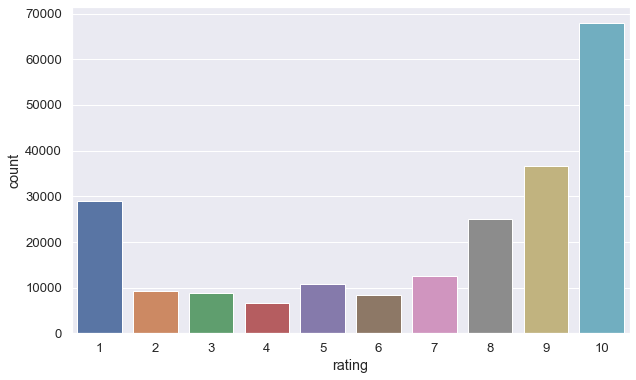

In [20]:
#check for rating distribution
plt.figure(figsize=(10,6))
sns.countplot(x = 'rating',data = drugsCom)

In [21]:
# remove all of rows whose condition is filled by "users found this comment helpful."
print("Number of Useless Reviews: ", 
      len(drugsCom[drugsCom.condition.str.contains("users found this comment helpful.", na = False)]))
drugsCom_New = drugsCom[~drugsCom.condition.str.contains("users found this comment helpful.", na = False)]
print("Number of Reviews after removing Useless Reviews: ", len(drugsCom_New))

Number of Useless Reviews:  1171
Number of Reviews after removing Useless Reviews:  213892


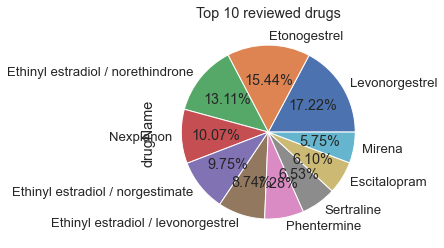

In [22]:
# Top 10 most reviewed drug names
drugsCom_New.drugName.value_counts().nlargest(10).plot(kind='pie', 
                                                       autopct='%1.2f%%',
                                                       title="Top 10 reviewed drugs")

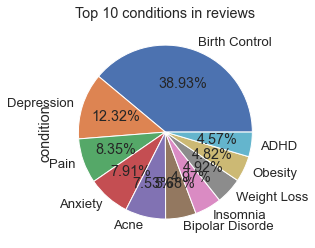

In [23]:
# Top 10 most reviewed condition by reviewers
drugsCom_New.condition.value_counts().nlargest(10).plot(kind='pie', 
                                                        autopct='%1.2f%%',
                                                        title="Top 10 conditions in reviews")

In [24]:
drugs_rating = drugsCom_New.groupby('drugName').agg({
    'rating': np.mean,
    'uniqueID': pd.Series.nunique
})

print("Significant number of reviews: More than", reviews_per_drug.quantile(q=0.75).values[0], "reviews")

Significant number of reviews: More than 30.0 reviews


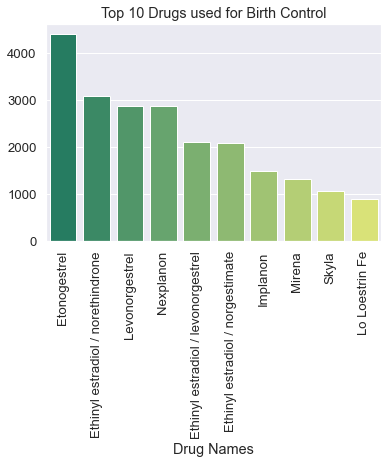

In [26]:
# Top 10 drugs which are used for the top condition, which is Birth Control
df = drugsCom_New[drugsCom_New['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

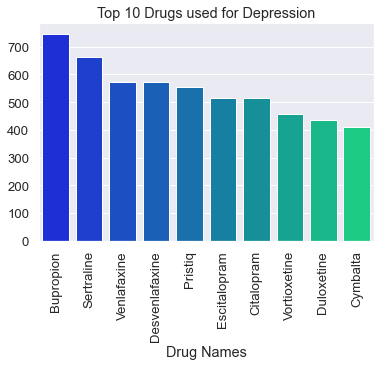

In [27]:
# Top 10 drugs which are used for the second most condition, which is Depression
df = drugsCom_New[drugsCom_New['condition'] == 'Depression']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'winter')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Depression")
plt.setp(sns_.get_xticklabels(), rotation = 90);

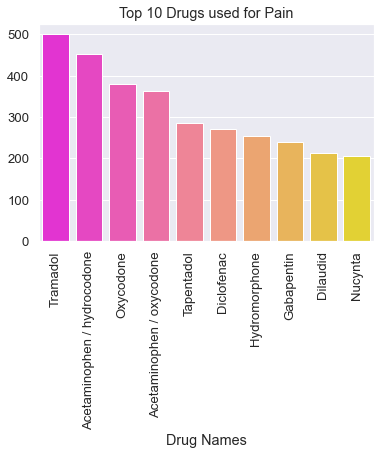

In [28]:
# Top 10 drugs which are used for the second most condition, which is Depression
df = drugsCom_New[drugsCom_New['condition'] == 'Pain']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'spring')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Pain")
plt.setp(sns_.get_xticklabels(), rotation = 90);

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

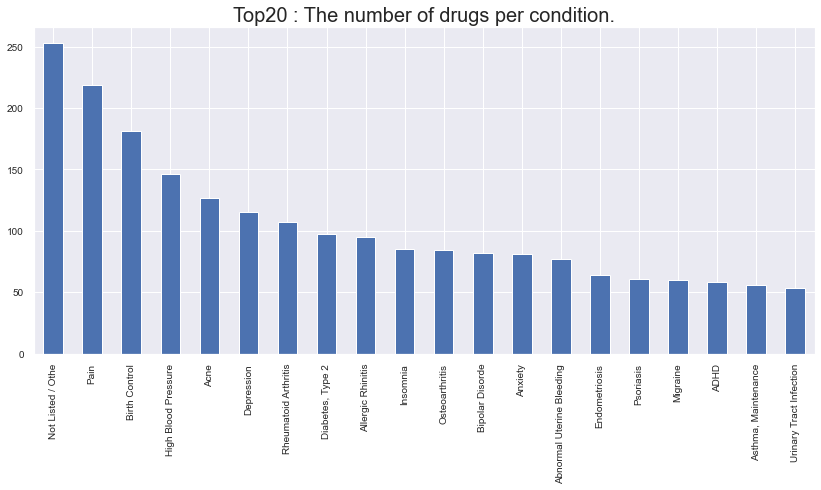

In [29]:
condition_dn = drugsCom_New.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

## Data Pre-processing

In [2]:
import pandas as pd
#read in the training data
drug_df = pd.read_csv("drugsComTrain_raw.csv")
drug_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


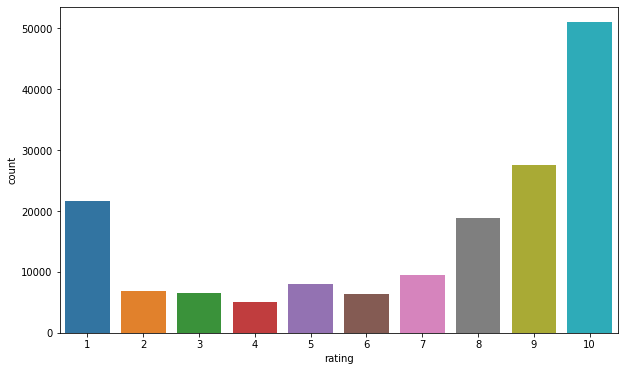

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
#check for rating distribution
plt.figure(figsize=(10,6))
sns.countplot(x = 'rating',data = drug_df)

In [4]:
#check the descriptive stats for usefulcount variable
drug_df['usefulCount'].describe()

count    161297.000000
mean         28.004755
std          36.403742
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

Text(0.5, 1.0, 'Total Missing Value ')

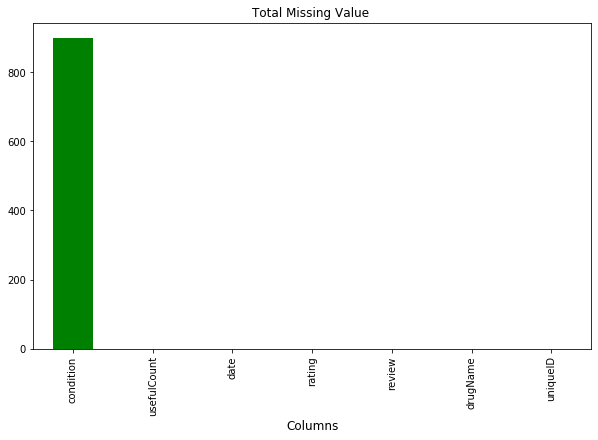

In [4]:
#plot the missing value
percent = (drug_df.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (10,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 12)
plt.ylabel("", fontsize = 15)
plt.title("Total Missing Value ", fontsize = 12)

In [8]:
print("Missing value (%):", 1194/drug_df.shape[0] *100)

Missing value (%): 0.7402493536767578


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

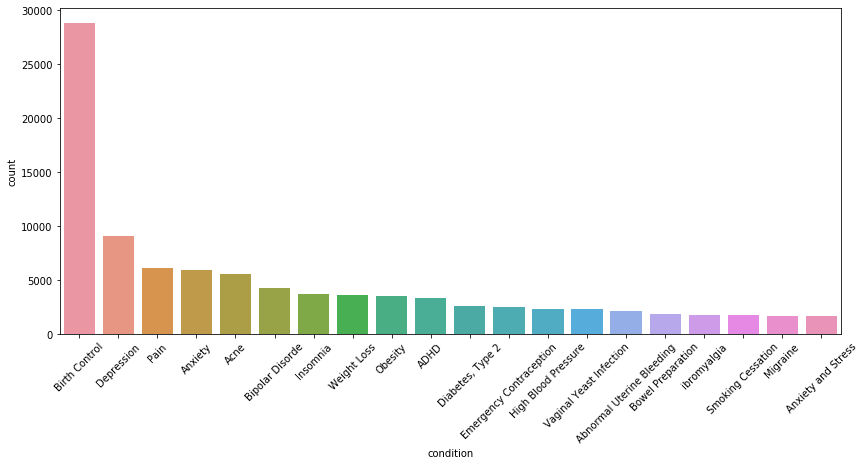

In [4]:
#plot the top 20 common conditions
plt.figure(figsize=(14,6))
sns.countplot(x = 'condition',data = drug_df, order = pd.value_counts(drug_df['condition']).iloc[:20].index)
plt.xticks(rotation=45)

In [5]:
#remove the missing values
drug_df.dropna(subset=['condition'], how='any', inplace=True)
len(drug_df)

160398

In [6]:
#read in the test data
drug_test = pd.read_csv("drugsComTest_raw.csv")
drug_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [7]:
frames = [drug_df, drug_test]
drug_all = pd.concat(frames)

In [7]:
drug_test.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [10]:
#remove missing values in test set
drug_test.dropna(subset=['condition'], how='any', inplace=True)
len(drug_test)

53471

In [11]:
#define sentiment ploarity of reviews based on rating
#rating 1-5: negative
#rating 6-10: positive
def rating_cat(rating):
    if rating in list(range(0,6)):
        return 0
    else:
        return 1


drug_df["sentiment"] = drug_df["rating"].apply(rating_cat)

In [12]:
drug_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1


In [13]:
#for test dataset, define sentiment ploarity of reviews based on rating
drug_test["sentiment"] = drug_test["rating"].apply(rating_cat)
drug_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,1
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,1
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,1
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,1
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,1


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(use_idf=True, stop_words='english')
#Convert a collection of raw documents to a matrix of TF-IDF features.

vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english', min_df=3)

In [15]:
#vectorize the reviews for train and test set
X_train = vectorizer.fit_transform(drug_df.review)
X_test = vectorizer.transform(drug_test.review)

### Multinomial Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
#build MNB model and get its accuracy and confusion matrix
y_train_rating = drug_df.sentiment
clf = MultinomialNB().fit(X_train, y_train_rating)

y_test_rating = drug_test.sentiment
pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, y_test_rating)))
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_rating))

Accuracy: 0.7698565577602813
Confusion Matrix
[[ 3979   166]
 [12140 37186]]


### RF

In [22]:
#build random forest model
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint

rf_clf = RandomForestClassifier(n_estimators = 100, min_samples_split = 2).fit(X_train, y_train_rating)
pred2 = rf_clf.predict(X_test)

print("RF Accuracy: %s" % str(rf_clf.score(X_test, y_test_rating)))
print("Confusion Matrix")
print(confusion_matrix(pred2, y_test_rating))

#from pprint import pprint
#print('Parameters currently in use:\n')
#pprint(rf_clf.get_params())

RF Accuracy: 0.9068654036767594
Confusion Matrix
[[11429   290]
 [ 4690 37062]]


In [31]:
#RF grid search steps
#import numpy as np
#from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 4)]
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(40, 70, num = 7)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]

# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split}
#pprint(random_grid)

{'max_depth': [40, 45, 50, 55, 60, 65, 70, None],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 150, 200]}


In [32]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3)
# Fit the random search model
#rf_random.fit(X_train, y_train_rating)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [33]:
#rf_random.best_params_

{'n_estimators': 50, 'min_samples_split': 10, 'max_depth': None}

In [37]:
#best_rf_clf = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, max_depth = 150).fit(X_train, y_train_rating)
#best_rf_pred = best_rf_clf.predict(X_test)

#print("Accuracy: %s" % str(best_rf_clf.score(X_test, y_test_rating)))
#print("Confusion Matrix")
#print(confusion_matrix(best_rf_pred, y_test_rating))

Accuracy: 0.8278693123375288
Confusion Matrix
[[ 7034   119]
 [ 9085 37233]]


### Linear SVM

In [19]:
#build linear SVM model and check its accuracy
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=2).fit(X_train, y_train_rating)
pred3 = svm_clf.predict(X_test)

print("Accuracy: %s" % str(svm_clf.score(X_test, y_test_rating)))
print("Confusion Matrix")
print(confusion_matrix(pred3, y_test_rating))

Accuracy: 0.9292513699014419
Confusion Matrix
[[13941  1605]
 [ 2178 35747]]


### Light GBM

In [16]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [17]:
#build light GBM model and get its accuracy and confusion matrix
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier(n_estimators=2000, max_depth = 10, num_leaves = 80).fit(X_train, y_train_rating)
pred4 = lgb_clf.predict(X_test)

print("Accuracy: %s" % str(lgb_clf.score(X_test, y_test_rating)))
print("Confusion Matrix")
print(confusion_matrix(pred4, y_test_rating))

Accuracy: 0.9021712704082587
Confusion Matrix
[[12522  1634]
 [ 3597 35718]]


In [40]:
print('Parameters currently in use:\n')
pprint(lgb_clf.get_params())

Parameters currently in use:

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


### Model Performance

In [17]:
#check precision and recall for all models
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#MNB model precision, recall and f-1 score
print(precision_score(y_test_rating, pred, average=None))
print(recall_score(y_test_rating, pred, average=None))
print(f1_score(y_test_rating, pred, average=None))

[0.95995175 0.75388233]
[0.24685154 0.99555579]
[0.39271615 0.85802626]


In [36]:
#RF model precision, recall and f-1 score
print(precision_score(y_test_rating, pred2, average=None))
print(recall_score(y_test_rating, pred2, average=None))
print(f1_score(y_test_rating, pred2, average=None))

[0.9630146  0.89398454]
[0.72851914 0.98792568]
[0.82951294 0.93861044]


In [37]:
#Linear SVM model precision, recall and f-1 score
print(precision_score(y_test_rating, pred3, average=None))
print(recall_score(y_test_rating, pred3, average=None))
print(f1_score(y_test_rating, pred3, average=None))

[0.78236151 0.87617804]
[0.70004343 0.91596166]
[0.7389169  0.89562827]


In [19]:
#light GBM model precision, recall and f-1 score
print(precision_score(y_test_rating, pred4, average=None))
print(recall_score(y_test_rating, pred4, average=None))
print(f1_score(y_test_rating, pred4, average=None))

[0.88457191 0.9085082 ]
[0.7768472  0.95625402]
[0.82721718 0.93176986]


In [18]:
from sklearn.metrics import classification_report
#MNB model classification report
target_names = ['0','1']
print(classification_report(y_test_rating, pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.25      0.39     16119
           1       0.75      1.00      0.86     37352

    accuracy                           0.77     53471
   macro avg       0.86      0.62      0.63     53471
weighted avg       0.82      0.77      0.72     53471



In [23]:
#RF classification report
print(classification_report(y_test_rating, pred2, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.71      0.82     16119
           1       0.89      0.99      0.94     37352

    accuracy                           0.91     53471
   macro avg       0.93      0.85      0.88     53471
weighted avg       0.91      0.91      0.90     53471



In [21]:
#Linear SVM classification report
print(classification_report(y_test_rating, pred3, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     16119
           1       0.94      0.96      0.95     37352

    accuracy                           0.93     53471
   macro avg       0.92      0.91      0.92     53471
weighted avg       0.93      0.93      0.93     53471



In [21]:
#Light GBM classification report
print(classification_report(y_test_rating, pred4, target_names=target_names))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83     16119
           1       0.91      0.96      0.93     37352

    accuracy                           0.90     53471
   macro avg       0.90      0.87      0.88     53471
weighted avg       0.90      0.90      0.90     53471



Text(0.5, 1.0, 'Model Accuracy')

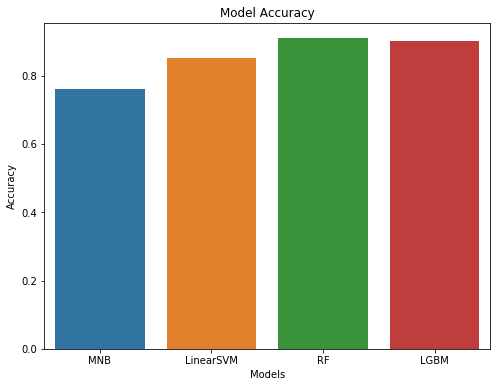

In [13]:
accuracy = [0.7620766396738419, 0.850872435525799, 0.9097267677806662, 0.9004320098745114]
model_name = ['MNB', 'LinearSVM', 'RF', 'LGBM']
accuracy_df = pd.DataFrame(list(zip(model_name, accuracy)), columns =['Models', 'Accuracy'])

plt.figure(figsize=(8,6))
ax = sns.barplot(x="Models", y="Accuracy", data=accuracy_df)
plt.title('Model Accuracy')

In [14]:
drug_all[drug_all.condition.str.contains("users found this comment helpful.", na = False)]

,uniqueID,drugName,condition,review,rating,date,usefulCount
105,220696,Loestrin 24 Fe,2</span> users found this comment helpful.,"""I&#039;m 16 and I have been on Loestrin 24 f...",3,3-Nov-10,2
196,67383,Provera,4</span> users found this comment helpful.,"""I&#039;m 24 years old and have always had a p...",1,27-Mar-16,4
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3,1-Jun-10,3
264,132965,Loestrin 24 Fe,4</span> users found this comment helpful.,"""Took this pill for 1.) Acne and 2.) Birth Con...",2,24-Jun-14,4
391,91050,Norco,11</span> users found this comment helpful.,"""I have suffered with low back pain - 2 surger...",9,15-Mar-09,11
...,...,...,...,...,...,...,...
52443,133354,Tri-Sprintec,3</span> users found this comment helpful.,"""I have been taking this pill for less than a ...",8,24-Sep-10,3
53116,149494,Mirena,5</span> users found this comment helpful.,"""I got the Mirena put in last month. And holy ...",7,12-Feb-13,5
53287,91988,Lyrica,21</span> users found this comment helpful.,"""It was a nightmare.I had the worse side effec...",1,14-Apr-15,21
53353,174757,Dulera,28</span> users found this comment helpful.,"""My 10 year old son took Dulera for asthma. I...",1,29-Feb-12,28


In [17]:
!pip install xgboost

In [22]:
#We also did experiment on Xgboost classifier, but the model performance is not good as other ensemble methods
#and it runs extremely slow

#from xgboost import XGBClassifier  
#from xgboost.sklearn import XGBRegressor

#xgb_clf = XGBClassifier(n_estimator = 2000,
#                    learning_rate=0.10,
#                    num_leaves=30).fit(X_train, y_train_rating)

#pred5 = xgb_clf.predict(X_test)

#print("Accuracy: %s" % str(xgb_clf.score(X_test, y_test_rating)))
#print("Confusion Matrix")
#print(confusion_matrix(pred5, y_test_rating))

[16:58:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy: 0.7859961474444092
Confusion Matrix
[[ 6093  1417]
 [10026 35935]]


In [22]:
#import xgboost as xgb

#xgb_clf = xgb.XGBClassifier()
#args = {'max_depth': 10, 'learning_rate': 0.1, 'booster': 'gbtree',
#        'n_jobs': -1, 'n_estimators': 1000}
#xgb_clf.set_params(**args)

#xgb_model = xgb_clf.fit(X_train, y_train_rating)
#pred5 = xgb_model.predict(X_test)

#print("Accuracy: %s" % str(xgb_model.score(X_test, y_test_rating)))
#print("Confusion Matrix")
#print(confusion_matrix(pred5, y_test_rating))
#Accuracy: 0.63099624095304

Accuracy: 0.8917544089319445
Confusion Matrix
[[11989  1658]
 [ 4130 35694]]


In [23]:
#print(precision_score(y_test_rating, pred5, average=None))
#print(recall_score(y_test_rating, pred5, average=None))
#print(f1_score(y_test_rating, pred5, average=None))

[0.8785081  0.89629369]
[0.74378063 0.95561148]
[0.80554996 0.92500259]


In [24]:
#print(classification_report(y_test_rating, pred5, target_names=target_names))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81     16119
           1       0.90      0.96      0.93     37352

    accuracy                           0.89     53471
   macro avg       0.89      0.85      0.87     53471
weighted avg       0.89      0.89      0.89     53471



In [25]:
import xgboost as xgb
xgb_clf2 = xgb.XGBClassifier()
args = {'max_depth': 10, 'learning_rate': 0.1, 'booster': 'gbtree',
        'n_jobs': -1, 'n_estimators': 1500}
xgb_clf2.set_params(**args)

xgb_model2 = xgb_clf2.fit(X_train, y_train_rating)
pred6 = xgb_model2.predict(X_test)

print("Accuracy: %s" % str(xgb_model2.score(X_test, y_test_rating)))
print("Confusion Matrix")
print(confusion_matrix(pred6, y_test_rating))

Accuracy: 0.9032372687999103
Confusion Matrix
[[12538  1593]
 [ 3581 35759]]


In [26]:
print(precision_score(y_test_rating, pred6, average=None))
print(recall_score(y_test_rating, pred6, average=None))
print(f1_score(y_test_rating, pred6, average=None))

[0.88726912 0.90897306]
[0.77783982 0.95735168]
[0.82895868 0.93253534]


In [27]:
#XGB classification report
print(classification_report(y_test_rating, pred6, target_names=target_names))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83     16119
           1       0.91      0.96      0.93     37352

    accuracy                           0.90     53471
   macro avg       0.90      0.87      0.88     53471
weighted avg       0.90      0.90      0.90     53471



### Regression

In [30]:
import numpy as np
# Get review text
reviews = np.vstack((drug_df.review.values.reshape(-1, 1), 
                     drug_test.review.values.reshape(-1, 1)))

vectorizer2 = TfidfVectorizer(ngram_range=(1,2), stop_words='english', min_df=3, max_features=1000)
# Vectorize reviews
X = vectorizer2.fit_transform(reviews.ravel()).toarray()

# Get ratings
ratings = np.concatenate((drug_df.rating.values, drug_test.rating.values)).reshape(-1, 1)
y = ratings
#get the train and test set
X_train, X_test = X[:drug_df.values.shape[0], :], X[drug_df.values.shape[0]:, :] 
y_train, y_test = y[:drug_df.values.shape[0]], y[drug_df.values.shape[0]:]

In [31]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((214768, 1000),
 (214768, 1),
 (161297, 1000),
 (161297, 1),
 (53471, 1000),
 (53471, 1))

In [33]:
#build Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train[:10000], y_train[:10000])

reg_pred = rf_reg.predict(X_test[:10000])

C:\Users\xiwsh\anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [35]:
#get model MSE and RMSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test[:10000], reg_pred)
print('Mean Squared Error (MSE):', mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Squared Error (MSE): 7.734617686732298
Root Mean Squared Error (RMSE): 2.7811180641483557
